<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.1 MB/s eta 0:00:00


WashTime: 102.38095238095238
WaterLevel: 86.78571428571429


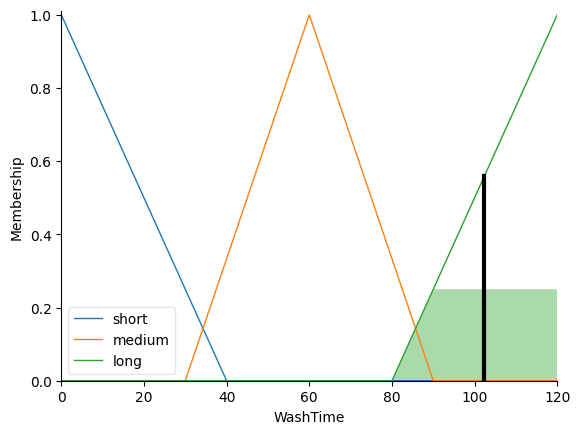

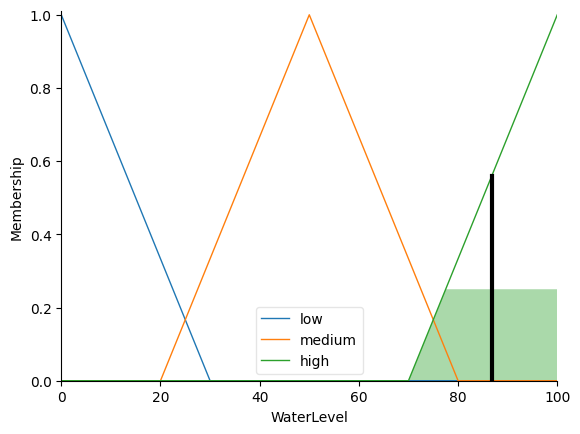

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

LoadAmount = ctrl.Antecedent(np.arange(0, 101, 1), 'LoadAmount')
DirtLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'DirtLevel')
FabricType = ctrl.Antecedent(np.arange(0, 101, 1), 'FabricType')

WashTime = ctrl.Consequent(np.arange(0, 121, 1), 'WashTime')
WaterLevel = ctrl.Consequent(np.arange(0, 101, 1), 'WaterLevel')

LoadAmount['small'] = fuzz.trimf(LoadAmount.universe, [0, 0, 40])
LoadAmount['medium'] = fuzz.trimf(LoadAmount.universe, [30, 50, 70])
LoadAmount['large'] = fuzz.trimf(LoadAmount.universe, [60, 100, 100])

DirtLevel['low'] = fuzz.trimf(DirtLevel.universe, [0, 0, 40])
DirtLevel['medium'] = fuzz.trimf(DirtLevel.universe, [30, 50, 70])
DirtLevel['high'] = fuzz.trimf(DirtLevel.universe, [60, 100, 100])

FabricType['delicate'] = fuzz.trimf(FabricType.universe, [0, 0, 40])
FabricType['normal'] = fuzz.trimf(FabricType.universe, [30, 50, 70])
FabricType['heavy'] = fuzz.trimf(FabricType.universe, [60, 100, 100])

WashTime['short'] = fuzz.trimf(WashTime.universe, [0, 0, 40])
WashTime['medium'] = fuzz.trimf(WashTime.universe, [30, 60, 90])
WashTime['long'] = fuzz.trimf(WashTime.universe, [80, 120, 120])

WaterLevel['low'] = fuzz.trimf(WaterLevel.universe, [0, 0, 30])
WaterLevel['medium'] = fuzz.trimf(WaterLevel.universe, [20, 50, 80])
WaterLevel['high'] = fuzz.trimf(WaterLevel.universe, [70, 100, 100])

rules = [
    ctrl.Rule(LoadAmount['small'] & DirtLevel['low'],(WashTime['short'] ,WaterLevel['low'])),
    ctrl.Rule(LoadAmount['small'] & DirtLevel['medium'], (WashTime['medium'] ,WaterLevel['medium'])),
    ctrl.Rule(LoadAmount['small'] & DirtLevel['high'], (WashTime['long'] , WaterLevel['medium'])),
    ctrl.Rule(LoadAmount['medium'] & DirtLevel['low'], (WashTime['medium'] , WaterLevel['medium'])),
    ctrl.Rule(LoadAmount['medium'] & DirtLevel['medium'], (WashTime['long'] , WaterLevel['medium'])),
    ctrl.Rule(LoadAmount['medium'] & DirtLevel['high'], (WashTime['long'] , WaterLevel['high'])),
    ctrl.Rule(LoadAmount['large'] & DirtLevel['low'], (WashTime['medium'] , WaterLevel['high'])),
    ctrl.Rule(LoadAmount['large'] & DirtLevel['medium'], (WashTime['long'] , WaterLevel['high'])),
    ctrl.Rule(LoadAmount['large'] & DirtLevel['high'], (WashTime['long'] , WaterLevel['high'])),
    ctrl.Rule(FabricType['delicate'], (WashTime['short'] , WaterLevel['low'])),
    ctrl.Rule(FabricType['heavy'], (WashTime['long'] , WaterLevel['high'])),
    ctrl.Rule(LoadAmount['large'] & DirtLevel['high'] & FabricType['heavy'], (WashTime['long'] , WaterLevel['high'])),
    ctrl.Rule(LoadAmount['small'] & DirtLevel['low'] & FabricType['delicate'], (WashTime['short'] , WaterLevel['low'])),
    ctrl.Rule(LoadAmount['medium'] & DirtLevel['medium'] & FabricType['normal'], (WashTime['medium'] , WaterLevel['medium'])),
]

control_sys = ctrl.ControlSystem(rules)
wash_sys = ctrl.ControlSystemSimulation(control_sys)

wash_sys.input['LoadAmount'] = 80
wash_sys.input['DirtLevel'] = 70
wash_sys.input['FabricType'] = 40

wash_sys.compute()

print('WashTime:', wash_sys.output['WashTime'])
print('WaterLevel:', wash_sys.output['WaterLevel'])
WashTime.view(sim=wash_sys)
WaterLevel.view(sim=wash_sys)